In [1]:
from setup import *
import sys
if DATA_PATH not in sys.path: sys.path.append(DATA_PATH)
from constants import *

%matplotlib inline
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', 200)


In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, 'all_tweets.csv.gz'))
rawlen = len(df)
df.drop_duplicates('id_str', keep='last', inplace=True)
rawlen - len(df)

/home/hobs/.virtualenvs/AgileMachineLearning/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (1,2,11,12,86,131,143,144,145,146,147,148,149,150,151,152,153,159,160,161,162,163,164,165,169,170,173,174,175,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,194,195,197) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10814

In [5]:
with gzip.open(os.path.join(DATA_PATH, 'deduped_tweets.csv.gz'), 'rb') as f:
    df = pd.read_csv(f, encoding='utf8', low_memory=False)

In [6]:
mask = np.array([bool('date' in c) for c in df.columns])
df.columns[mask]

Index([], dtype='object')

In [7]:
df.columns[np.array([bool('time' in c) for c in df.columns])]

Index([], dtype='object')

Remember any date or time columns from Dan's tutorial?

In [8]:
mask = np.array([c.endswith('_at') for c in df.columns])
df.columns[mask]

Index([], dtype='object')

In [9]:
dates = df[df.columns[mask]]
dates

""
0
1
...
183068
183069


In [10]:
dates = pd.DataFrame(index=df.index)
for col in df.columns[np.array([bool(c.endswith('_at')) for c in df.columns])]:
    print(col)
    dates[col] = pd.to_datetime(df[col])

In [11]:
dates

""
0
1
...
183068
183069


In [38]:
# import gzip
# with gzip.open(os.path.join(DATA_PATH, 'datetimes.csv.gz'), 'wb') as f:
#     dates.to_csv(f)
#     # dates.to_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), compression='gzip')

In [39]:
%ls -thal DATA_PATH
!ls -thal data

ls: cannot access 'DATA_PATH': No such file or directory
ls: cannot access 'data': No such file or directory


In [40]:
system("ls %s" % DATA_PATH)

['/bin/bash: ls %s: command not found']

In [41]:
ls -thal ../../data

ls: cannot access '../../data': No such file or directory


In [12]:
dates = pd.read_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), engine='python')

for col in dates.columns:
    print(col)
    dates[col] = pd.to_datetime(dates[col])

Unnamed: 0
created_at
quoted_status_created_at
quoted_status_user_created_at
retweeted_status_created_at
retweeted_status_quoted_status_created_at
retweeted_status_quoted_status_user_created_at
retweeted_status_user_created_at
user_created_at


In [13]:
dates.created_at.dt.hour


0         16
1         16
          ..
183068    16
183069    16
Name: created_at, dtype: int64

In [14]:
dates.created_at.dt.weekday

0         6
1         6
         ..
183068    6
183069    6
Name: created_at, dtype: int64

NameError: name 'plt' is not defined

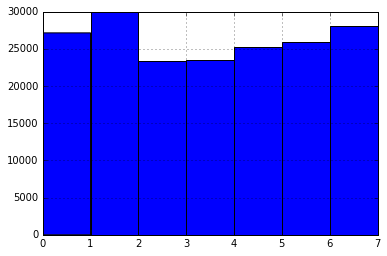

In [15]:
dow = pd.Series(dates.created_at.dt.weekday)
dow.hist(bins=[0,1,2,3,4,5,6,7])
plt.xlabel('0=Mon    6=Sun')
plt.ylabel('Tweets')

In [18]:
nums = pd.read_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), engine='python')

In [19]:
features = pd.DataFrame({'faves': nums.favorite_count, 'weekday': dow})

,faves,weekday
0,0,6
1,0,6
2,1,6
...,...,...
183067,0,6
183068,0,6
183069,0,6


In [24]:
names = pd.Series([''] * len(dow), index=dow.index)
for i, label in enumerate('Mon Tues Wed Thurs Fri Sat Sun'.split()):
    names[dow == i] = label

In [33]:
faves_by_dow = pd.Series(Counter(names[nums.favorite_count > 0]))
faves_by_dow

Fri      4925
Mon      4945
Sat      4591
Sun      4971
Thurs    4399
Tues     5131
Wed      4330
dtype: int64

In [34]:
fave_ratio_by_dow = pd.Series(Counter(names[nums.favorite_count > 0])) / pd.Series(Counter(names))
fave_ratio_by_dow

Fri      0.194780
Mon      0.182197
Sat      0.177547
Sun      0.177074
Thurs    0.187447
Tues     0.171479
Wed      0.185654
dtype: float64

Keep in mind, these aren't big differences  
And we have a sample bias ("Python" in May)

Now it's your turn  
Can you do a similar analysis for Time of Day  
Hint: think of a good "bin" size  
Use tab-completion on the `dt` accessor method of the dates you are interested in  